_**Group Assingment 4**_
__By Adam Kaba and Juliette Oliver__

Here we are building off of our spatial analysis skills with Python in order to look through a unique lense at our data. These visualizations give us new insight and further our research to better understand the societal and economic impacts of the Olympics.

Here we will import all necessary packages in order to begin to analyze our data. Specifically, we use geopandas to help spatially visualize our data.


In [1]:
import pandas as pd
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt
import numpy as np


/opt/conda/lib/python3.8/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.8.1-CAPI-1.13.3) is incompatible with the GEOS version PyGEOS was compiled with (3.9.0-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(


Importing the necissary datasets that we will use to begin analyzing our data. These datasets include plot points of populated places around the world and information about summer Olympic competitors from the years 1970 to 2007.

In [3]:
cities = gpd.read_file("ne_50m_populated_places.geojson")
ss = gpd.read_file("Summer_Sports.csv")




Using .info() to gain more information about the available variables in our data.

In [4]:
cities.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1249 entries, 0 to 1248
Data columns (total 93 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   SCALERANK   1249 non-null   int64   
 1   NATSCALE    1249 non-null   int64   
 2   LABELRANK   1249 non-null   int64   
 3   FEATURECLA  1249 non-null   object  
 4   NAME        1249 non-null   object  
 5   NAMEPAR     66 non-null     object  
 6   NAMEALT     193 non-null    object  
 7   DIFFASCII   1249 non-null   int64   
 8   NAMEASCII   1249 non-null   object  
 9   ADM0CAP     1249 non-null   int64   
 10  CAPALT      1249 non-null   int64   
 11  CAPIN       35 non-null     object  
 12  WORLDCITY   1249 non-null   int64   
 13  MEGACITY    1249 non-null   int64   
 14  SOV0NAME    1249 non-null   object  
 15  SOV_A3      1249 non-null   object  
 16  ADM0NAME    1249 non-null   object  
 17  ADM0_A3     1249 non-null   object  
 18  ADM1NAME    1162 non-null   object  
 19

Using .head() allows us to see the first 5 entries of our data, giving us an insight into the types of figures we can expect to see.

In [5]:
ss.head()

,City,Year,Sport,Discipline,Event,Athlete,Gender,Country_Code,Country,Event_gender,Medal,geometry
0,Montreal,1976,Aquatics,Diving,3m springboard,"b'K\xd6HLER, Christa'",Women,GDR,East Germany,W,Silver,None
1,Montreal,1976,Aquatics,Diving,3m springboard,"KOSENKOV, Aleksandr",Men,URS,Soviet Union,M,Bronze,None
2,Montreal,1976,Aquatics,Diving,3m springboard,"BOGGS, Philip George",Men,USA,United States,M,Gold,None
3,Montreal,1976,Aquatics,Diving,3m springboard,"CAGNOTTO, Giorgio Franco",Men,ITA,Italy,M,Silver,None
4,Montreal,1976,Aquatics,Diving,10m platform,"WILSON, Deborah Keplar",Women,USA,United States,W,Bronze,None


We will drop "geometry' because it is NA. Next we will replace the column name of "Country_Code" to "CODE" so that it will allign with another column we will import later from a different dataset later in our data exploration.

In [6]:
ss = ss.drop(columns = 'geometry')

In [7]:
ss.rename(columns={'Country_Code':'CODE'}, inplace=True)

In [8]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.columns=['pop_est', 'continent', 'name', 'CODE', 'gdp_md_est', 'geometry']

Now, we will connect our data to a github account that has the latitude and longitude of all 3 letter alpha codes for countries. This will allow the 3 letter alpha codes asociated with our countries to be assigned relevent cordinates which will allow us to map it latter in our data exploration.

In [9]:
 merge=pd.merge(world,ss,on='CODE')
location=pd.read_csv('https://raw.githubusercontent.com/melanieshi0120/COVID-19_global_time_series_panel_data/master/data/countries_latitude_longitude.csv')
merge=merge.merge(location,on='name').reset_index()

We are doing a similer process of renaming cities with cordinate points so that we will be able to mark them on maps.

In [10]:
cities =cities.rename(columns = {"NAME": "Destination"})

In [11]:
merge =merge.rename(columns = {"City": "Destination"})

In [12]:
cities =cities.rename(columns = {"LATITUDE": "Destination_lat"})

In [13]:
cities =cities.rename(columns = {"LONGITUDE": "Destination_long"})

In [14]:
cities = cities[['Destination','Destination_lat','Destination_long']]

In [15]:
cities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1249 entries, 0 to 1248
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Destination       1249 non-null   object 
 1   Destination_lat   1249 non-null   float64
 2   Destination_long  1249 non-null   float64
dtypes: float64(2), object(1)
memory usage: 29.4+ KB


Because our dataset is so large, we have decided to filter our data by gender in order to both run our program with more ease and to investigate specifically the Olympic paths of women.

In [16]:
merge = merge[merge["Gender"] == "Women"]

In [17]:
merge=merge.merge(cities, on = "Destination")

In [18]:
merge.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 4818 entries, 0 to 4817
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   index             4818 non-null   int64   
 1   pop_est           4818 non-null   int64   
 2   continent         4818 non-null   object  
 3   name              4818 non-null   object  
 4   CODE              4818 non-null   object  
 5   gdp_md_est        4818 non-null   float64 
 6   geometry          4818 non-null   geometry
 7   Destination       4818 non-null   object  
 8   Year              4818 non-null   object  
 9   Sport             4818 non-null   object  
 10  Discipline        4818 non-null   object  
 11  Event             4818 non-null   object  
 12  Athlete           4818 non-null   object  
 13  Gender            4818 non-null   object  
 14  Country           4818 non-null   object  
 15  Event_gender      4818 non-null   object  
 16  Medal           

We are importing Kerler because it provides a unqiue ability to spatially visualize our data efficiently and with aestheticallty pleasing map layouts

In [19]:

from keplergl import KeplerGl


In [20]:
#Create a basemap 
map = KeplerGl(height=600, width=800)



User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


In [21]:
map.add_data(data=merge)

In [22]:
map


KeplerGl(data={'unnamed': {'index': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,…

Here is our map depicting all of the countries that sent women to the Olympics in 2000. The red marks their send off and the green marks their destination (Greece) As we can see from this map, a large majority of countries sent female athletes to the games this year. What is most notable about this visualization though, is the lack of female representation from countries in africa and Central Asia. From Africa, there are only 4 countries that sent female athletes in 2000. This leads us to beg the question "Why were women disproportionately underrepresented from countries within Africa and Central Asia"? From our previous research about the economic impacts of the Olympics, we can already hypothesize that Economic cost may play a role in womens abilities to go to the Olympics from these countries. A comparison with different years to compare female athlete representation would be helpful in informing us about the trends of Female Represenation from various regions of the world throughout history.

Next, we will import contextlily and various other packages to further help us spatialize our data.

In [29]:
import contextily as ctx
from sodapy import Socrata
import matplotlib.pyplot as plt

# new for data viz
import seaborn as sns

# to explore point patterns
from pointpats import centrography
from matplotlib.patches import Ellipse
import numpy
import pycountry


We will merge these two datasets containing information about athlete events and the countries from which these athletes come from in order to visualize our findings later.

In [31]:

olympics = pd.merge(pd.read_csv("athlete_events.csv"),pd.read_csv("noc_regions.csv"), on = "NOC")
print(olympics.shape)
olympics =olympics.rename(columns = {"region": "country"})
olympics.head()

(270767, 17)


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,country,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,602,Abudoureheman,M,22.0,182.0,75.0,China,CHN,2000 Summer,2000,Summer,Sydney,Boxing,Boxing Men's Middleweight,NaN,China,NaN
3,1463,Ai Linuer,M,25.0,160.0,62.0,China,CHN,2004 Summer,2004,Summer,Athina,Wrestling,"Wrestling Men's Lightweight, Greco-Roman",NaN,China,NaN
4,1464,Ai Yanhan,F,14.0,168.0,54.0,China,CHN,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Women's 200 metres Freestyle,NaN,China,NaN


Similarly, we will assign 3 letter alpha codes to our data in order to recieve cordinate points that will allow us to plot our countries on a map.

In [32]:
def alpha3code(column):
    CODE=[]
    for country in column:
        try:
            code=pycountry.countries.get(name=country).alpha_3
            CODE.append(code)
        except:
            CODE.append('None')
    return CODE

In [33]:
olympics['CODE']=alpha3code(olympics.country)

It was necissary for us to make small alterations to country codes as some of them were missing or incorrect. Here we make those changes in order to make sure these will map later.

In [34]:
olympics["CODE"][olympics["country"] == "Russia"] = "RUS"
olympics["CODE"][olympics["country"] == 'United States of America'] = "USA"
olympics["CODE"][olympics["country"] == "Vietnam"] = "VNM"
olympics["CODE"][olympics["country"] == "North Korea"] = "PRK"
olympics["CODE"][olympics["country"] == "South Korea"] = "KOR"
olympics["CODE"][olympics["country"] == "Iran"] = "IRN"
olympics["CODE"][olympics["country"] == "Bolivia"] = "BOL"
olympics["CODE"][olympics["country"] == "Republic of Congo"] = "COG"

<ipython-input-34-eb42d135b075>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  olympics["CODE"][olympics["country"] == "Russia"] = "RUS"
<ipython-input-34-eb42d135b075>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  olympics["CODE"][olympics["country"] == 'United States of America'] = "USA"
<ipython-input-34-eb42d135b075>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  olympics["CODE"][olympics["country"] == "Vietnam"] = "VNM"
<ip

In [35]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.columns=['pop_est', 'continent', 'name', 'CODE', 'gdp_md_est', 'geometry']

In [36]:
merge2=pd.merge(world,olympics,on='CODE')
location=pd.read_csv('https://raw.githubusercontent.com/melanieshi0120/COVID-19_global_time_series_panel_data/master/data/countries_latitude_longitude.csv')
merge2=merge2.merge(location,on='name').sort_values(by=['country','Year'], ascending=True).reset_index()

/opt/conda/lib/python3.8/site-packages/contextily/tile.py:583: RuntimeWarning: divide by zero encountered in log2
  zoom_lon = np.ceil(np.log2(360 * 2.0 / lon_length))


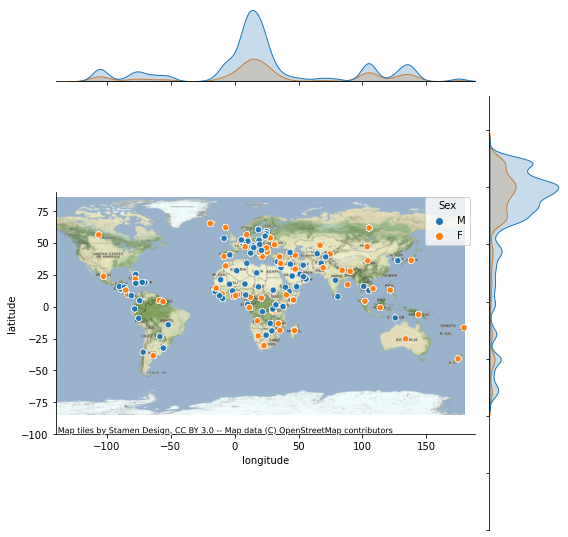

In [38]:
g = sns.jointplot(data = merge2,
           x = 'longitude',
           y = 'latitude',
           hue = 'Sex',
            ylim = [-100,90],
            xlim = [-140,188],
                 height=8) 

# add basemap
ctx.add_basemap(g.ax_joint,
                crs='epsg:4326')

Here is our map depicting male to female representation in the form of dots on a map. What is most notable about these maps is that if we look at our plot above the graph, we can see that male representation far outweighs female representation over the time the Olympics have spanded. This is interesting to us, because it makes us questions why countries in the middle of the map would high higher male representation than female? Since this map does take into account total number of participants from both sexes who have competed in the Olympics, we believe this could be due to Europes dominant role in the Olympics from the very inception of the games. Since many European countries have undergone high rates of development and economic gain, we hypothesize that these countries are primarily able to afford the high cost of training and sending athletes to the games. We also hypothesize that due to some restrictive measures to block female athletes from competing in Africa, that this could lead to the disproportionate amount of male to female athletes.

/opt/conda/lib/python3.8/site-packages/contextily/tile.py:583: RuntimeWarning: divide by zero encountered in log2
  zoom_lon = np.ceil(np.log2(360 * 2.0 / lon_length))


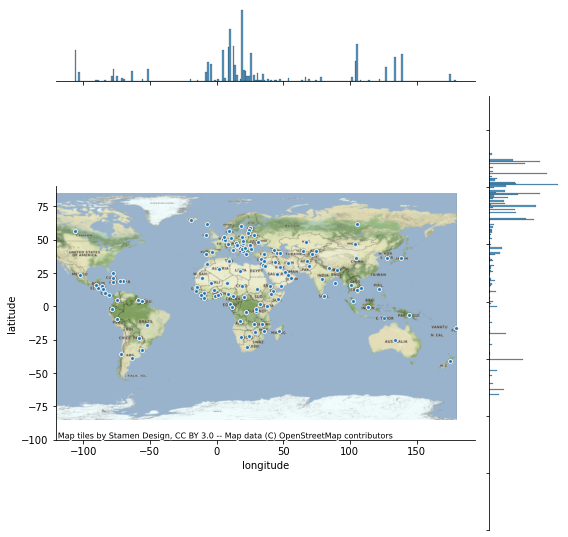

In [40]:
g = sns.jointplot(data = merge2,
           x = 'longitude',
           y = 'latitude',
                ylim = [-100,90],
                  s = 10,
                 height=8) 

# add basemap
ctx.add_basemap(g.ax_joint,
                crs='epsg:4326')

Similarly to the graph above, this map demonstrates total number of athletes from their respetive countries (but this time not divided by sex). Just as before, we can see that the middle of the graph has the highest number of Olympic representatives. What is notable here is though now we can see that indeed on the ends of the graph we can see larger numbers of Olympic representatives. This may come from countries with the highest populations in those regions, such as the U.S., China, and Russia. What these graphs ultimately tell us is that representation in athletes both of gender and nationality is not equal across the board. We believe this to be due to the drastic differences in development between countries around the world and due to the fight for womens rights that continues on today. As we could see in our first graph of our data exploration, that many countries from what we consider "under developed" countries did not send Olympic representatives in 2000, largely from what we believe to be the inability to handle the cost of training and sending athletes. What this means for the olympics future, is that if countries can not even afford to train or send Olympic athletes, then they are much less likely to have the ability to handle the rising price of hosting the Olympics. In the end, this lack of possible hosts or even athletes could mean an end to the Olympic games in the future. Further research is needed, but we believe that a change in the ability for athletes to be financed and sent to the games could help even out the representation of both gender and nationality in the games. In addition, this critical view of finances by the Olympic commity could be the key to cutting costs at the Olympics, helping make the games more affordable for hosts and ultimately continueing the survival of the games for years to come.